In [1578]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import plotly.express as px
import plotly.graph_objects as go
import statistics
from datetime import timedelta, datetime

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, classification_report, RocCurveDisplay, make_scorer
from xgboost import XGBClassifier
sns.set_theme()

## Load Data

In [1579]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
display(train_df.head())
test_df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [1580]:
spray_df = pd.read_csv('../data/spray.csv')
spray_df.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [1581]:
weather_df = pd.read_csv('../data/weather.csv')
weather_df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


## EDA & Preprocessing + Cleaning

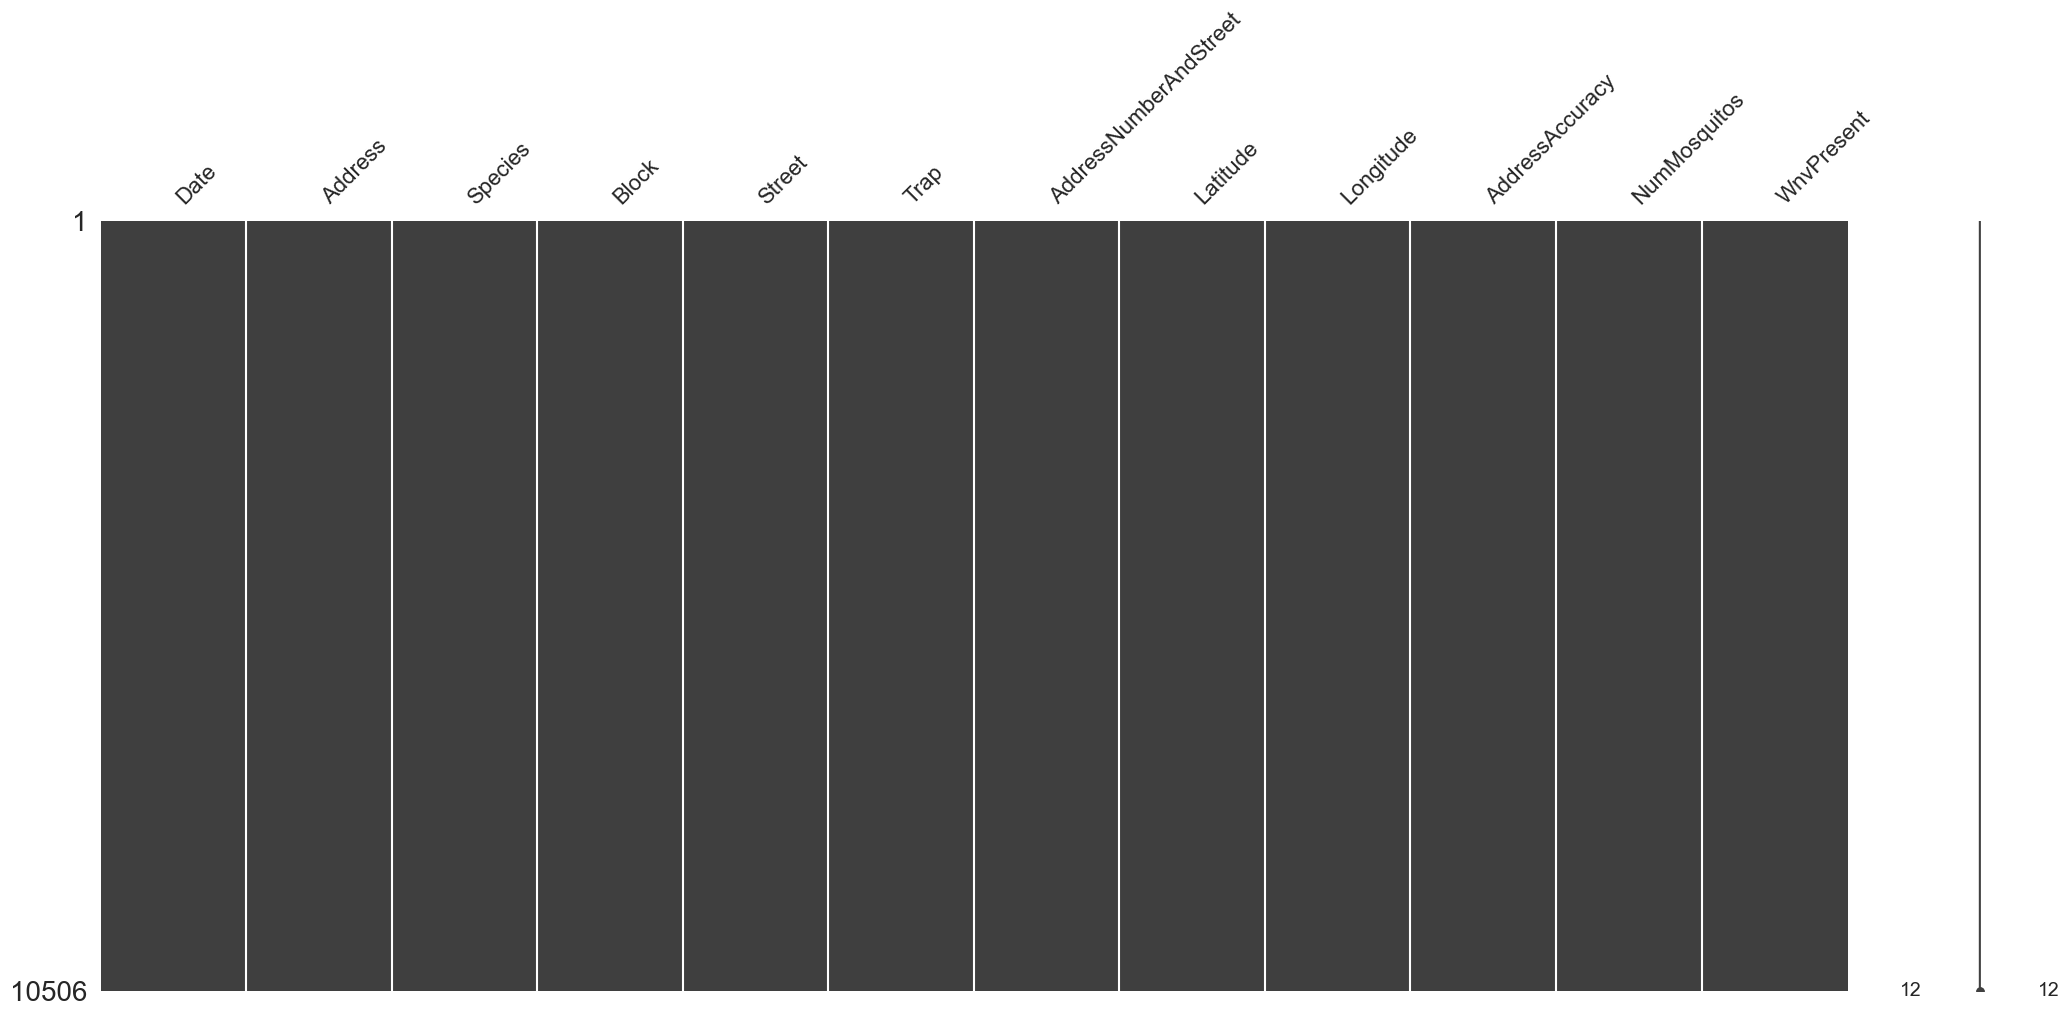

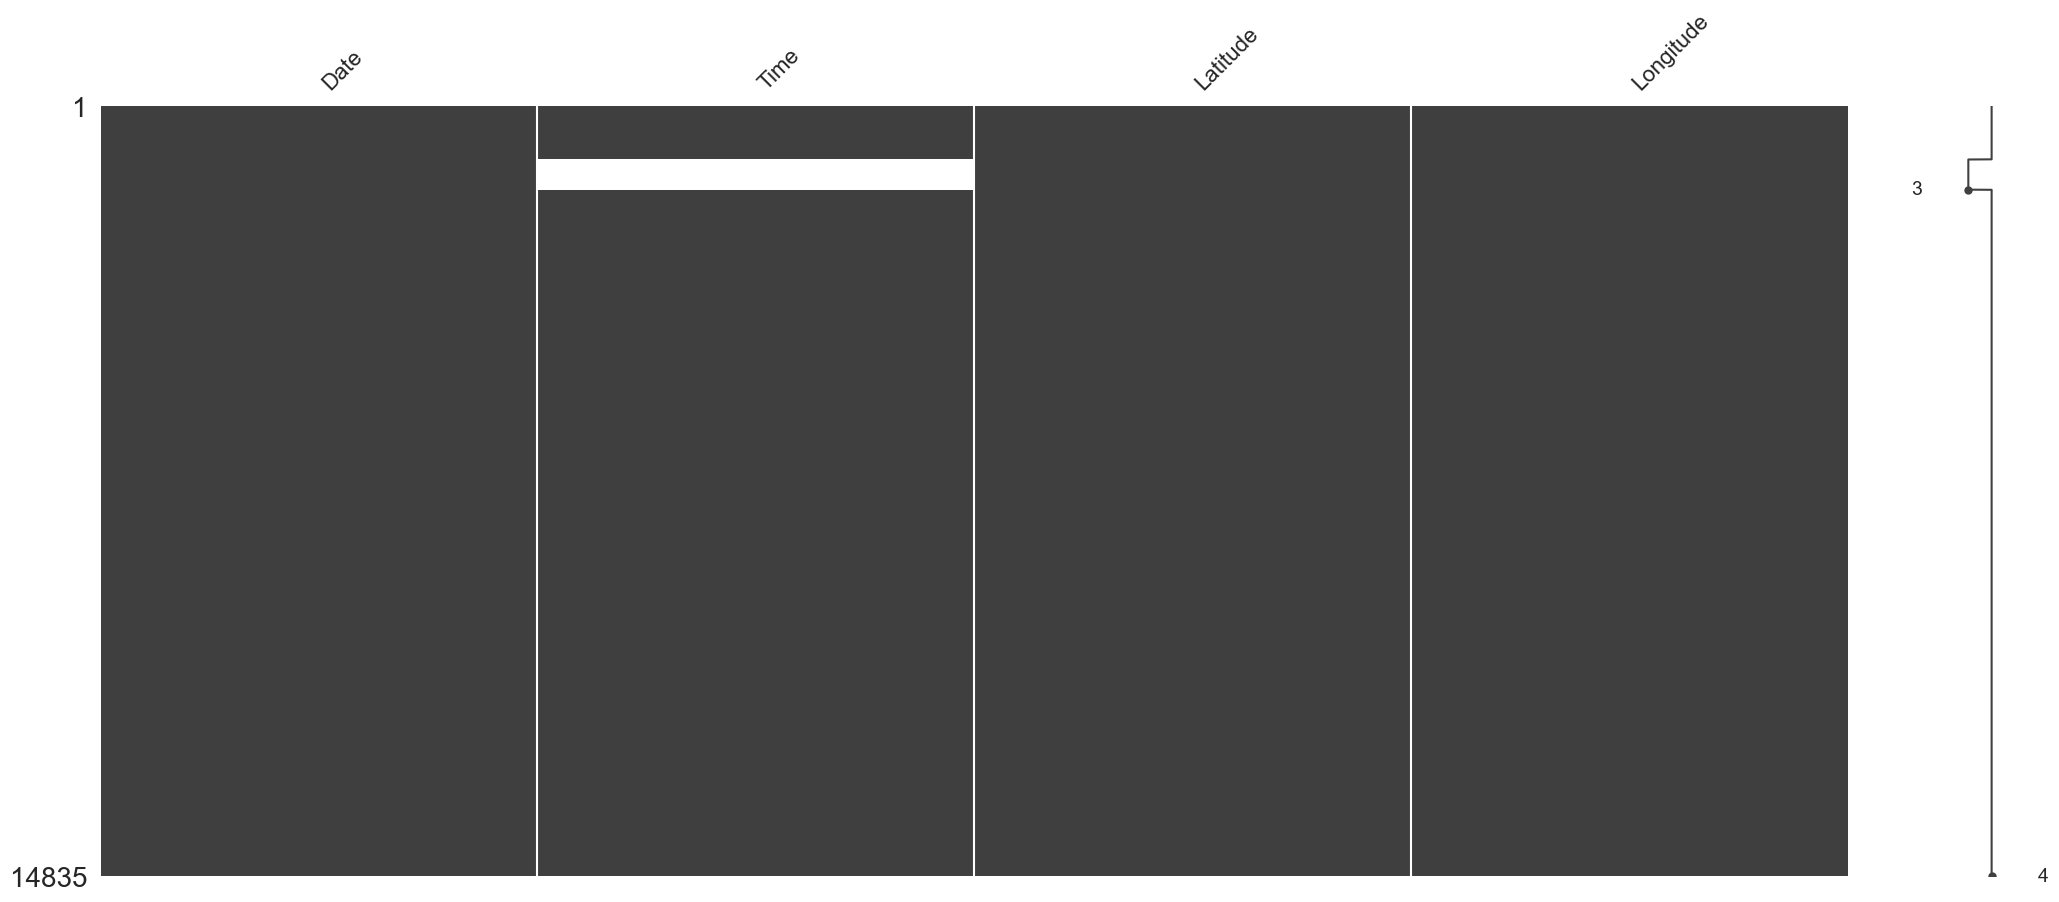

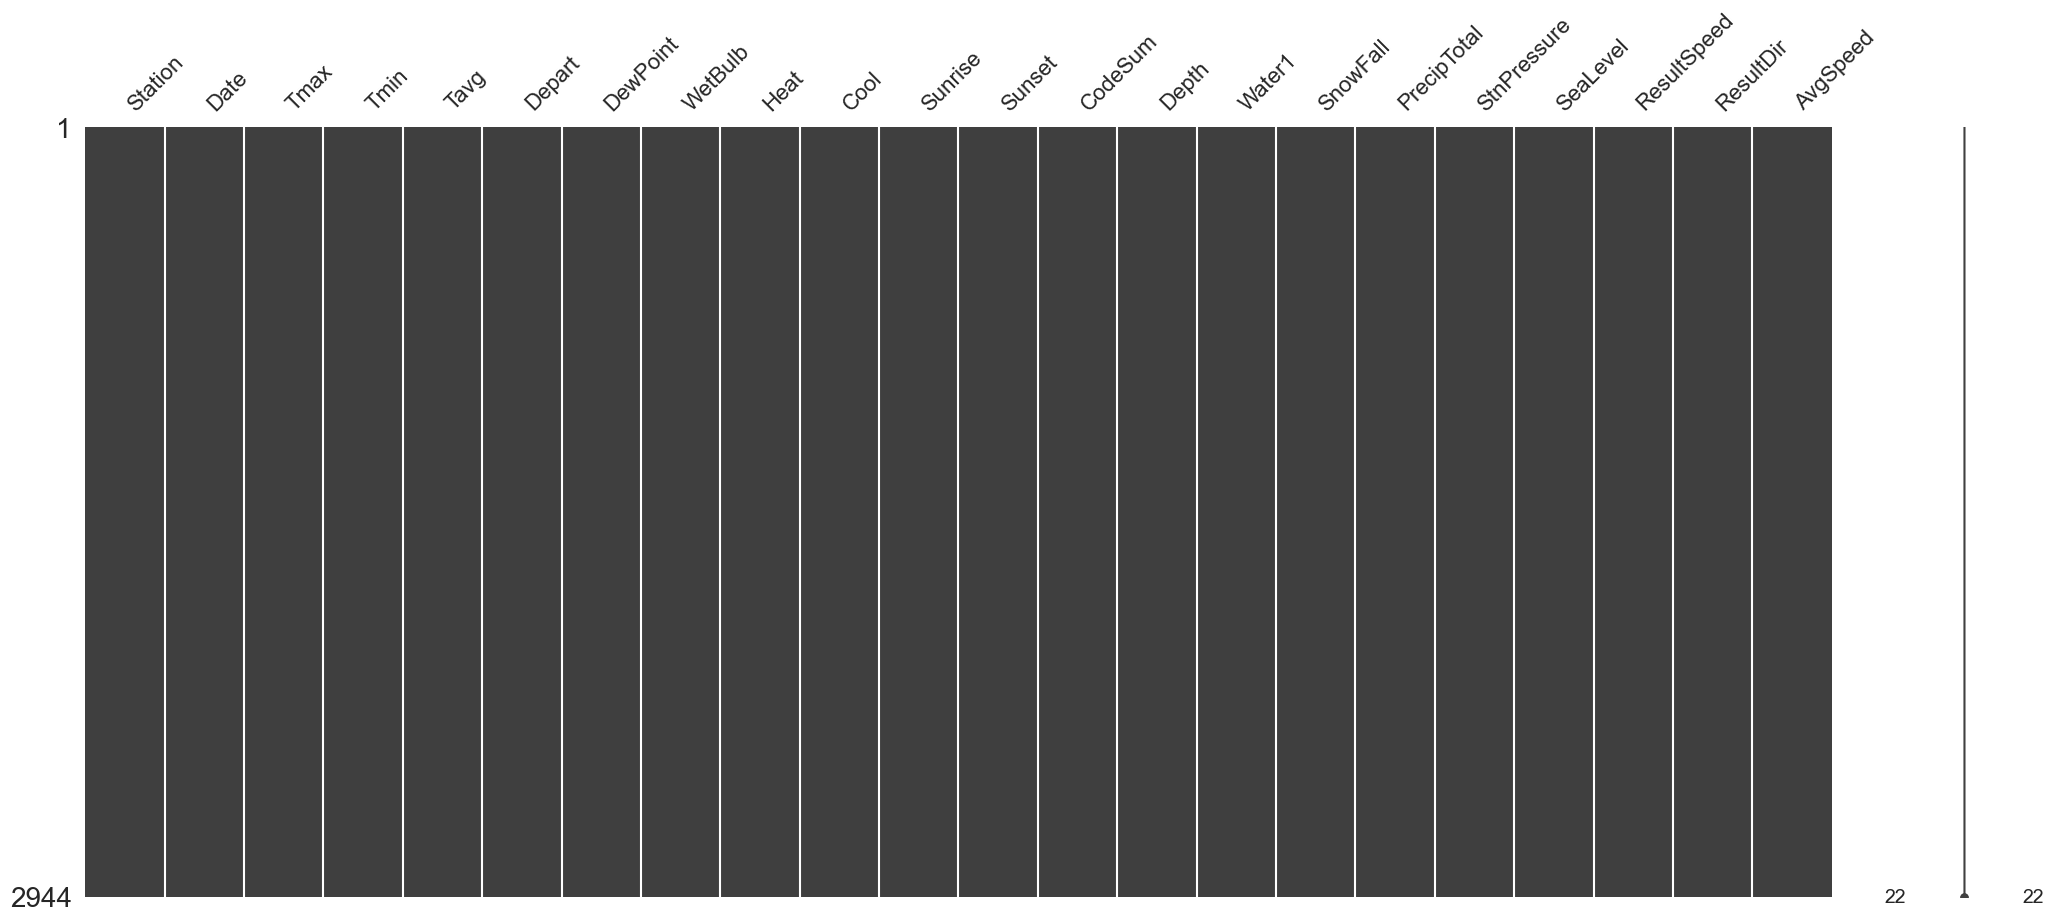

In [1582]:
# Mssing values
msno.matrix(train_df)
msno.matrix(spray_df)
msno.matrix(weather_df);

In [1583]:
# Spray missing values
display(spray_df.isna().sum())
spray_df.shape

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

(14835, 4)

### Spray data cleaning

In [1584]:
# Display spray data
spray_df.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [1585]:
# Find incorrect format and values in spray data
display(spray_df.info())
for col in spray_df:
    print(col)
    print(spray_df[col].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


None

Date
['2011-08-29' '2011-09-07' '2013-07-17' '2013-07-25' '2013-08-08'
 '2013-08-15' '2013-08-16' '2013-08-22' '2013-08-29' '2013-09-05']
Time
['6:56:58 PM' '6:57:08 PM' '6:57:18 PM' ... '8:04:01 PM' '8:04:11 PM'
 '8:04:21 PM']
Latitude
[42.39162333 42.39134833 42.39102167 ... 42.00602167 42.00545333
 42.004805  ]
Longitude
[-88.08916333 -88.08915667 -88.08915833 ... -87.81739167 -87.81742333
 -87.81746   ]


In [1586]:
# Drop 'Time' column
spray_df.drop(columns='Time', inplace=True)

In [1587]:
# Convert date to datetime
spray_df['Date'] = pd.to_datetime(spray_df['Date'])
spray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14835 non-null  datetime64[ns]
 1   Latitude   14835 non-null  float64       
 2   Longitude  14835 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 347.8 KB


### Weather data cleaning

In [1588]:
# Display weather data
weather_df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [1589]:
# Find incorrect format and values in weather data
display(weather_df.info())
for col in weather_df:
    print(col)
    print(weather_df[col].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

None

Station
[1 2]
Date
['2007-05-01' '2007-05-02' '2007-05-03' ... '2014-10-29' '2014-10-30'
 '2014-10-31']
Tmax
[ 83  84  59  60  66  67  78  68  82  80  77  76  70  73  64  65  69  90
  62  61  71  79  87  89  88  75  85  86  81  72  63  91  92  93  74  94
  54  53  56  57  58  55  50  95  52  47  45  51  48  44  49  46  96  99
 100 101  97  98 102 103 104  42  41]
Tmin
[50 52 42 43 46 48 49 51 53 54 47 60 61 63 56 59 44 57 45 55 66 65 70 68
 62 67 64 58 71 69 73 75 72 74 39 41 40 37 34 38 35 36 33 31 32 76 77 29
 78 79 80 81 82 83]
Tavg
['67' '68' '51' '52' '56' '58' 'M' '60' '59' '65' '70' '69' '71' '61' '55'
 '57' '73' '72' '53' '62' '63' '74' '75' '78' '76' '77' '66' '80' '64'
 '81' '82' '79' '85' '84' '83' '50' '49' '46' '48' '45' '54' '47' '44'
 '40' '41' '38' '39' '42' '37' '43' '86' '87' '89' '92' '88' '91' '93'
 '94' '90' '36']
Depart
['14' 'M' '-3' ' 2' ' 4' ' 5' '10' '12' '13' '-2' '15' '11' '-4' '-6' ' 8'
 '-5' ' 1' ' 9' ' 6' '-9' '-8' ' 3' ' 0' '-1' '-7' ' 7' '-14' '18' '16'

In [1590]:
# Number of incorrect format and values in weather data
for col in weather_df:
    if weather_df[(weather_df[col] == 'M') | (weather_df[col] == '  T') | (weather_df[col] == '-')].shape[0] != 0:
        print(col)
        print('M', weather_df[(weather_df[col] == 'M')].shape)
        print('T', weather_df[(weather_df[col] == '  T')].shape)
        print('-', weather_df[(weather_df[col] == '-')].shape)

Tavg
M (11, 22)
T (0, 22)
- (0, 22)
Depart
M (1472, 22)
T (0, 22)
- (0, 22)
WetBulb
M (4, 22)
T (0, 22)
- (0, 22)
Heat
M (11, 22)
T (0, 22)
- (0, 22)
Cool
M (11, 22)
T (0, 22)
- (0, 22)
Sunrise
M (0, 22)
T (0, 22)
- (1472, 22)
Sunset
M (0, 22)
T (0, 22)
- (1472, 22)
Depth
M (1472, 22)
T (0, 22)
- (0, 22)
Water1
M (2944, 22)
T (0, 22)
- (0, 22)
SnowFall
M (1472, 22)
T (12, 22)
- (0, 22)
PrecipTotal
M (2, 22)
T (318, 22)
- (0, 22)
StnPressure
M (4, 22)
T (0, 22)
- (0, 22)
SeaLevel
M (9, 22)
T (0, 22)
- (0, 22)
AvgSpeed
M (3, 22)
T (0, 22)
- (0, 22)


In [1591]:
# Drop column with a lot of missing/unusable values in weather
weather_df.drop(columns=['Depart', 'Sunrise', 'Sunset', 'Depth', 'Water1', 'SnowFall', 'CodeSum'], inplace=True)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   DewPoint     2944 non-null   int64  
 6   WetBulb      2944 non-null   object 
 7   Heat         2944 non-null   object 
 8   Cool         2944 non-null   object 
 9   PrecipTotal  2944 non-null   object 
 10  StnPressure  2944 non-null   object 
 11  SeaLevel     2944 non-null   object 
 12  ResultSpeed  2944 non-null   float64
 13  ResultDir    2944 non-null   int64  
 14  AvgSpeed     2944 non-null   object 
dtypes: float64(1), int64(5), object(9)
memory usage: 345.1+ KB


In [1592]:
# Convert date to datetime
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

In [1593]:
# Replace PrecipTotal 'T' (Trace) with very small value
weather_df['PrecipTotal'] = weather_df['PrecipTotal'].map(lambda x: 0.001 if x == '  T' else x)

In [1594]:
# Replace 'M' value with NaN, prepare for imputer
weather_df.replace('M', np.nan, inplace=True)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2933 non-null   object        
 5   DewPoint     2944 non-null   int64         
 6   WetBulb      2940 non-null   object        
 7   Heat         2933 non-null   object        
 8   Cool         2933 non-null   object        
 9   PrecipTotal  2942 non-null   object        
 10  StnPressure  2940 non-null   object        
 11  SeaLevel     2935 non-null   object        
 12  ResultSpeed  2944 non-null   float64       
 13  ResultDir    2944 non-null   int64         
 14  AvgSpeed     2941 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(8)
m

In [1595]:
# Convert all object field to float
weather_df[['Tavg', 'WetBulb', 'Heat', 'Cool', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'AvgSpeed']] = weather_df[['Tavg', 'WetBulb', 'Heat', 'Cool', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'AvgSpeed']].astype(float)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2933 non-null   float64       
 5   DewPoint     2944 non-null   int64         
 6   WetBulb      2940 non-null   float64       
 7   Heat         2933 non-null   float64       
 8   Cool         2933 non-null   float64       
 9   PrecipTotal  2942 non-null   float64       
 10  StnPressure  2940 non-null   float64       
 11  SeaLevel     2935 non-null   float64       
 12  ResultSpeed  2944 non-null   float64       
 13  ResultDir    2944 non-null   int64         
 14  AvgSpeed     2941 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(5)
memory usage

In [1596]:
# Separate weather into 2 df (station 1 and 2)
weather_df_station_1 = weather_df[weather_df['Station'] == 1].drop(columns='Station')
weather_df_station_2 = weather_df[weather_df['Station'] == 2].drop(columns='Station')

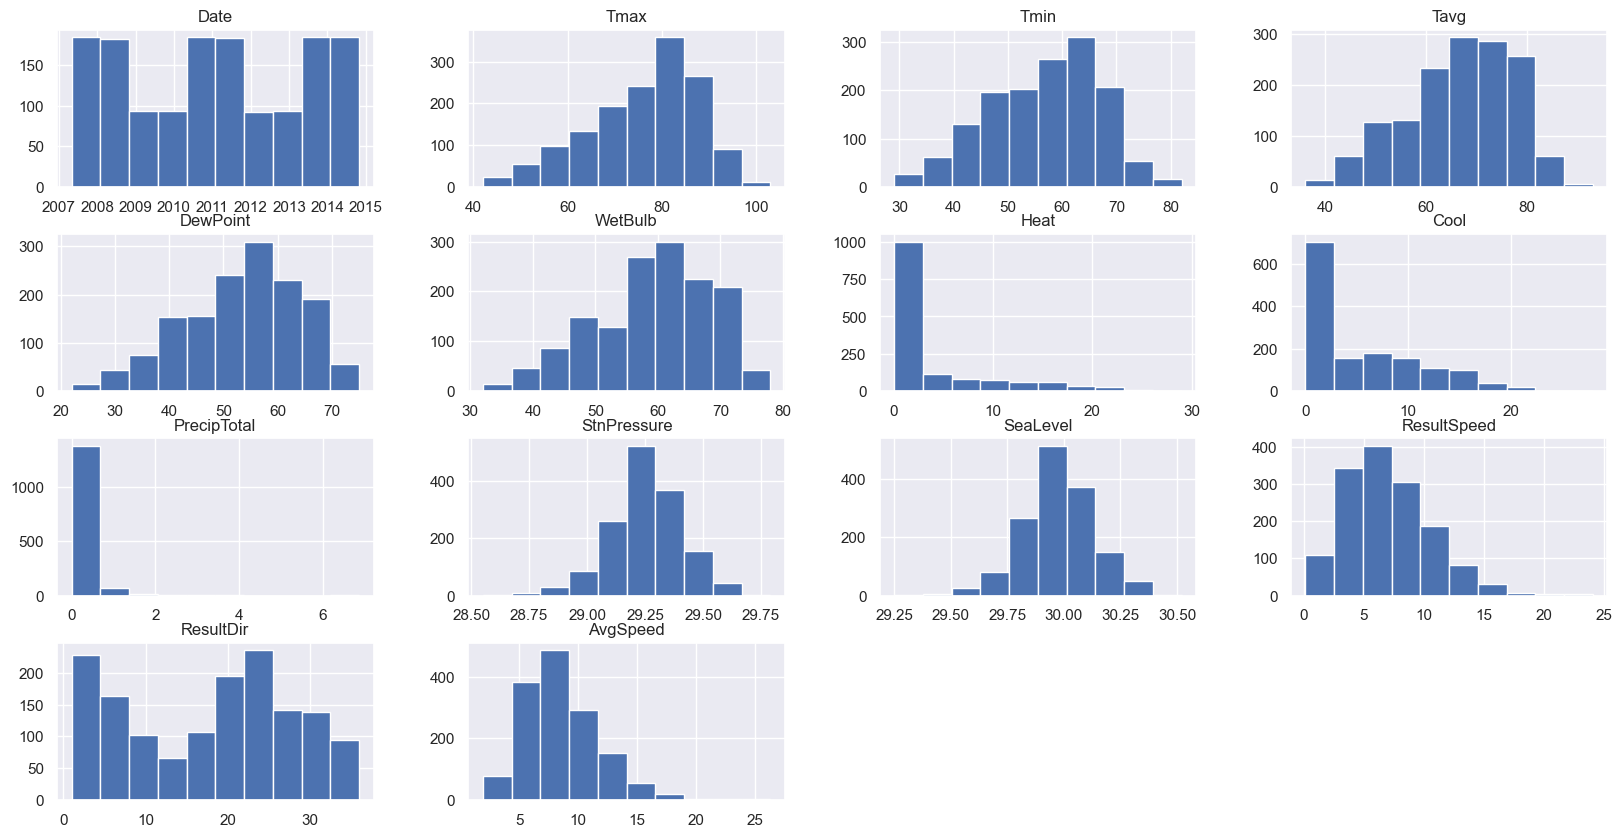

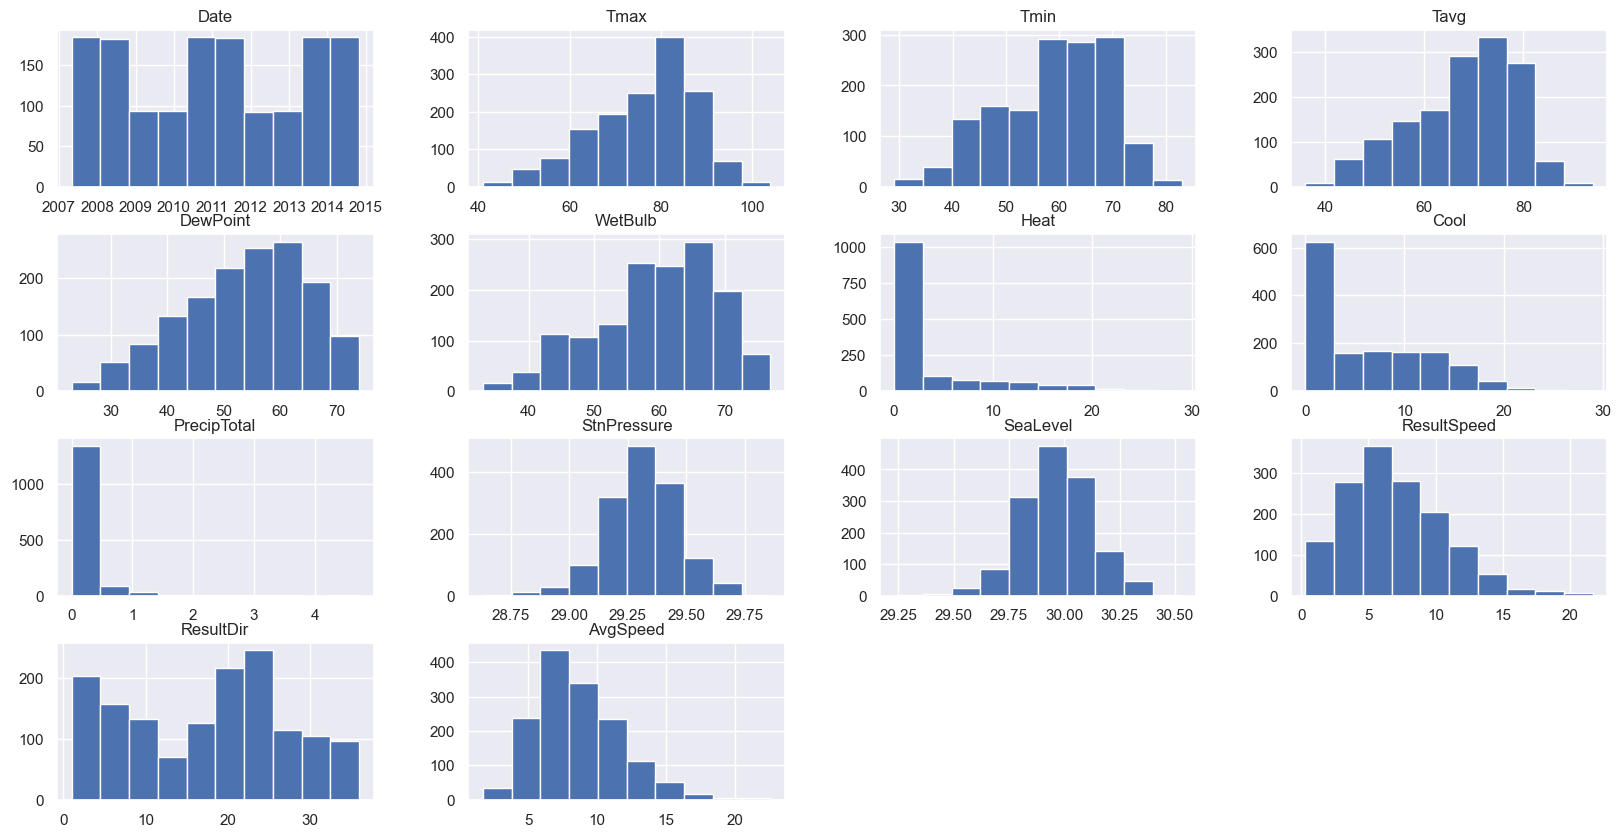

In [1597]:
# Data from 2 stations is a little bit different (not that much)
weather_df_station_1.hist(figsize=(20, 10))
weather_df_station_2.hist(figsize=(20, 10));

In [1598]:
# Create new weather df, average data from 2 stations. If one missing, using the other one instead
weather_df_avg = (weather_df_station_1.set_index('Date') + weather_df_station_2.set_index('Date')) / 2
weather_df_avg = weather_df_avg.combine_first(weather_df_station_1.set_index('Date')).combine_first(weather_df_station_2.set_index('Date'))
weather_df_avg.reset_index(inplace=True)

display(weather_df_avg.info())
weather_df_avg.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1472 non-null   datetime64[ns]
 1   Tmax         1472 non-null   float64       
 2   Tmin         1472 non-null   float64       
 3   Tavg         1472 non-null   float64       
 4   DewPoint     1472 non-null   float64       
 5   WetBulb      1472 non-null   float64       
 6   Heat         1472 non-null   float64       
 7   Cool         1472 non-null   float64       
 8   PrecipTotal  1472 non-null   float64       
 9   StnPressure  1471 non-null   float64       
 10  SeaLevel     1472 non-null   float64       
 11  ResultSpeed  1472 non-null   float64       
 12  ResultDir    1472 non-null   float64       
 13  AvgSpeed     1472 non-null   float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 161.1 KB


None

,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-01,83.5,51.0,67.5,51.0,56.5,0.0,2.5,0.0000,29.140,29.820,2.20,26.0,9.40
1,2007-05-02,59.5,42.5,51.5,42.0,47.0,13.5,0.0,0.0000,29.410,30.085,13.15,3.0,13.40
2,2007-05-03,66.5,47.0,57.0,40.0,49.0,8.0,0.0,0.0000,29.425,30.120,12.30,6.5,12.55
3,2007-05-04,72.0,50.0,58.0,41.5,50.0,7.0,0.0,0.0005,29.335,30.045,10.25,7.5,10.60
4,2007-05-05,66.0,53.5,60.0,38.5,49.5,5.0,0.0,0.0010,29.430,30.095,11.45,7.0,11.75


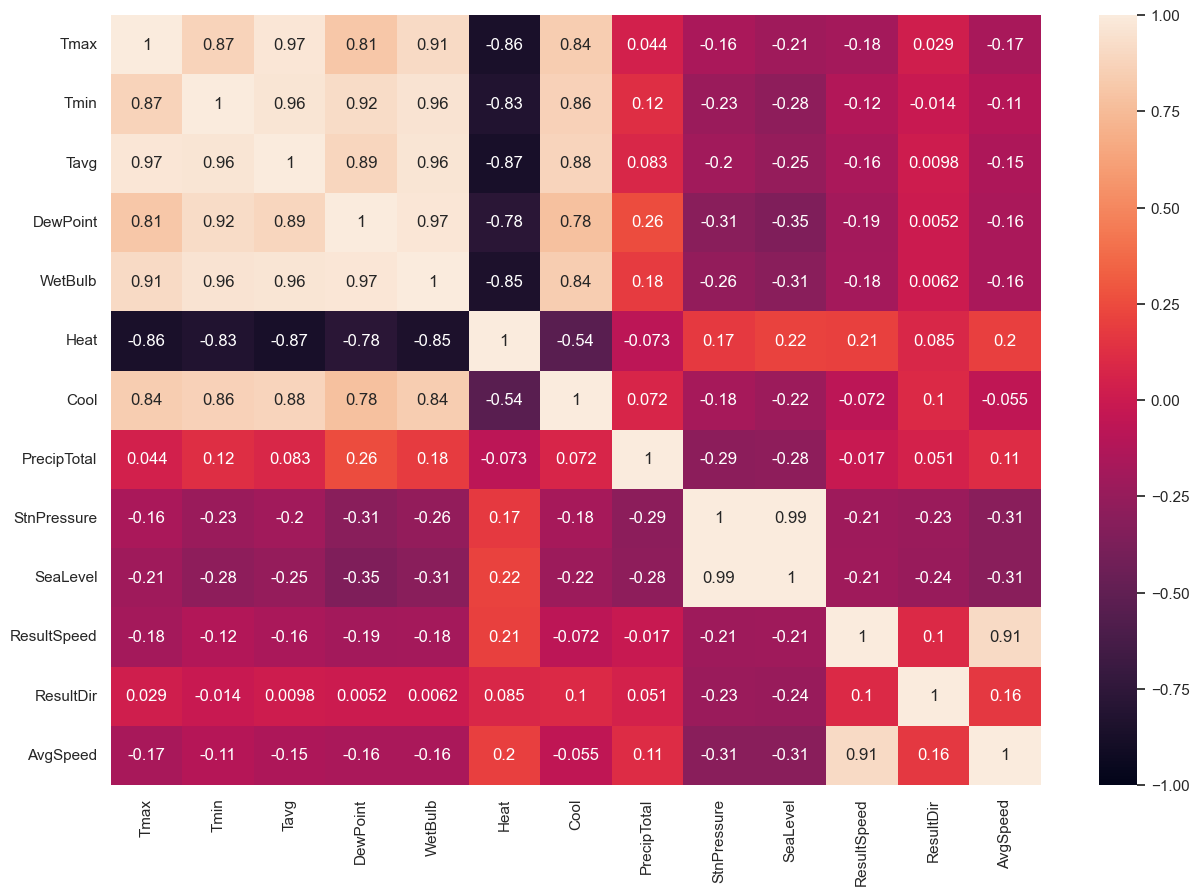

In [1599]:
# Correlation
plt.figure(figsize=(15, 10))
sns.heatmap(weather_df_avg.corr(numeric_only=True), annot=True, vmin=-1, vmax=1);

In [1600]:
# Drop Tmin, Tmax, Heat, Cool, WetBulb, DewPoint (strong correlation with Tavg) ResultSpeed (Strong correlation with AvgSpeed) SeaLevel (Strong correlation with StnPressure)
# weather_df_avg.drop(columns=['Tmin', 'Tmax', 'Heat', 'Cool', 'WetBulb', 'DewPoint', 'ResultSpeed', 'SeaLevel'], inplace=True)

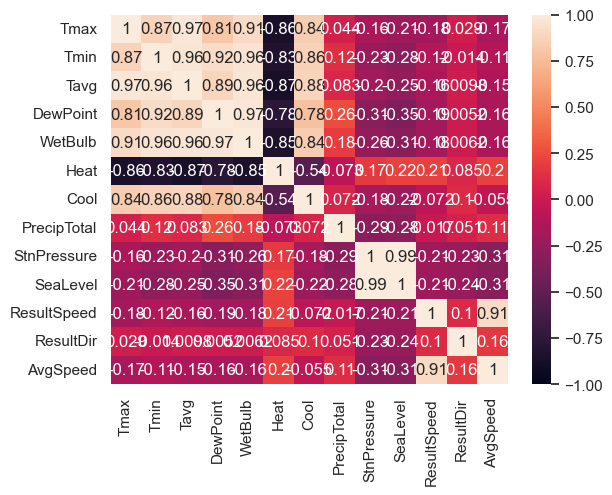

In [1601]:
# Recheck Correlation
sns.heatmap(weather_df_avg.corr(numeric_only=True), annot=True, vmin=-1, vmax=1);

In [1602]:
# Extract weeknum and year
# weather_df_avg['weeknum'] = weather_df_avg['Date'].dt.strftime("%U").astype(int)
# weather_df_avg['year'] = weather_df_avg['Date'].dt.year

In [1603]:
# Set date as index for timeseries processing
weather_df_avg.set_index('Date', inplace=True)
weather_df_avg.head()

,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,
2007-05-01,83.5,51.0,67.5,51.0,56.5,0.0,2.5,0.0000,29.140,29.820,2.20,26.0,9.40
2007-05-02,59.5,42.5,51.5,42.0,47.0,13.5,0.0,0.0000,29.410,30.085,13.15,3.0,13.40
2007-05-03,66.5,47.0,57.0,40.0,49.0,8.0,0.0,0.0000,29.425,30.120,12.30,6.5,12.55
2007-05-04,72.0,50.0,58.0,41.5,50.0,7.0,0.0,0.0005,29.335,30.045,10.25,7.5,10.60
2007-05-05,66.0,53.5,60.0,38.5,49.5,5.0,0.0,0.0010,29.430,30.095,11.45,7.0,11.75


In [1604]:
# Check rolling average result
weather_df_avg.rolling(14).mean().reset_index()

,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2014-10-27,62.000000,46.285714,54.464286,44.321429,49.464286,10.607143,0.071429,0.072286,29.228571,29.925714,7.042857,22.178571,9.046429
1468,2014-10-28,62.071429,45.821429,54.250000,42.964286,48.642857,10.821429,0.071429,0.008036,29.252143,29.947500,7.882143,23.250000,9.453571
1469,2014-10-29,61.535714,44.857143,53.500000,41.607143,47.821429,11.571429,0.071429,0.003750,29.274643,29.970357,7.850000,22.821429,9.428571
1470,2014-10-30,61.178571,43.642857,52.714286,40.464286,47.035714,12.357143,0.071429,0.003714,29.297500,29.993571,7.903571,22.750000,9.292857


In [1605]:
# Check resampling average result
weather_df_avg.resample('2W').mean().reset_index()

,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-06,69.250000,49.083333,58.916667,40.500000,49.666667,6.500000,0.416667,0.000250,29.389167,30.075000,10.575000,10.083333,12.075000
1,2007-05-20,74.750000,50.464286,62.785714,43.321429,52.607143,4.321429,2.107143,0.054357,29.380714,30.072857,8.182143,15.535714,9.917857
2,2007-06-03,80.750000,59.785714,70.535714,53.964286,61.035714,0.821429,6.357143,0.101214,29.326429,30.014643,7.421429,16.964286,8.889286
3,2007-06-17,82.607143,60.964286,72.000000,54.035714,61.607143,1.035714,8.035714,0.055821,29.241071,29.917500,7.117857,14.928571,8.800000
4,2007-07-01,79.857143,63.250000,71.785714,57.678571,63.464286,0.107143,6.892857,0.102643,29.367500,30.045000,7.628571,12.607143,9.032143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2014-09-14,75.607143,58.500000,67.250000,55.464286,60.321429,3.500000,5.750000,0.177179,29.346071,30.028571,7.110714,24.714286,9.075000
193,2014-09-28,73.642857,53.250000,63.714286,50.892857,56.428571,2.607143,1.321429,0.008714,29.440000,30.131071,4.400000,17.892857,6.167857
194,2014-10-12,64.142857,46.142857,55.428571,43.071429,49.214286,10.214286,0.642857,0.105214,29.203571,29.897500,8.432143,18.714286,9.675000
195,2014-10-26,61.357143,46.642857,54.321429,44.892857,49.642857,10.678571,0.000000,0.110143,29.231429,29.930357,6.703571,21.857143,8.742857


### Train data cleaning

In [1606]:
# Display train data
train_df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [1607]:
# Find incorrect format and values in train data
display(train_df.info())
for col in train_df:
    print(col)
    print(train_df[col].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


None

Date
['2007-05-29' '2007-06-05' '2007-06-26' '2007-06-29' '2007-07-02'
 '2007-07-11' '2007-07-18' '2007-07-19' '2007-07-25' '2007-07-27'
 '2007-08-01' '2007-08-02' '2007-08-03' '2007-08-07' '2007-08-08'
 '2007-08-09' '2007-08-15' '2007-08-16' '2007-08-17' '2007-08-21'
 '2007-08-22' '2007-08-24' '2007-08-28' '2007-09-04' '2007-09-05'
 '2007-09-06' '2007-09-12' '2007-09-18' '2007-09-19' '2007-09-24'
 '2007-09-25' '2007-10-04' '2007-10-09' '2009-05-28' '2009-06-02'
 '2009-06-03' '2009-06-05' '2009-06-12' '2009-06-15' '2009-06-19'
 '2009-06-22' '2009-06-26' '2009-06-29' '2009-07-06' '2009-07-10'
 '2009-07-13' '2009-07-17' '2009-07-24' '2009-07-27' '2009-07-31'
 '2009-08-07' '2009-08-13' '2009-08-25' '2009-08-27' '2009-09-03'
 '2009-09-14' '2009-09-17' '2009-09-25' '2009-10-01' '2011-06-10'
 '2011-06-17' '2011-06-24' '2011-06-30' '2011-07-11' '2011-07-15'
 '2011-07-25' '2011-07-29' '2011-08-05' '2011-08-12' '2011-08-19'
 '2011-08-26' '2011-09-01' '2011-09-02' '2011-09-12' '2011-09-16'
 '201

In [1608]:
# Convert Date to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    10506 non-null  datetime64[ns]
 1   Address                 10506 non-null  object        
 2   Species                 10506 non-null  object        
 3   Block                   10506 non-null  int64         
 4   Street                  10506 non-null  object        
 5   Trap                    10506 non-null  object        
 6   AddressNumberAndStreet  10506 non-null  object        
 7   Latitude                10506 non-null  float64       
 8   Longitude               10506 non-null  float64       
 9   AddressAccuracy         10506 non-null  int64         
 10  NumMosquitos            10506 non-null  int64         
 11  WnvPresent              10506 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), ob

In [1609]:
# col = list(train_df.drop(columns=['NumMosquitos', 'WnvPresent']).columns)
# grouped_df = train_df.copy()
# grouped_df['Count'] = train_df.groupby(col, as_index=False)['NumMosquitos'].transform('count')
# grouped_df

In [1610]:
# grouped_df[grouped_df['Date'].dt.month == 8]['Date'].unique()

In [1611]:
# grouped_df[grouped_df['Date'] == '2009-08-27']

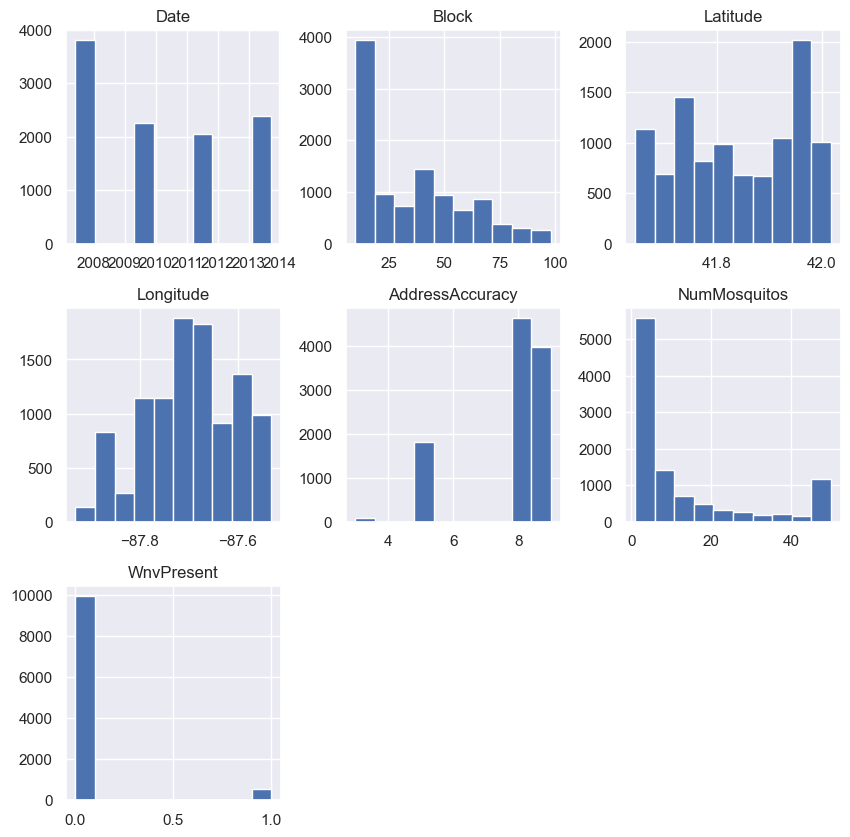

In [1612]:
# Train data distribution
train_df.hist(figsize=(10, 10));

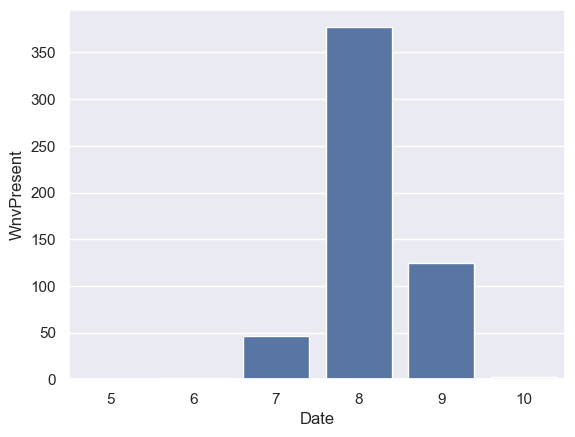

In [1613]:
# Target variable (west nile virus present) group by month
sns.barplot(train_df.groupby(train_df['Date'].dt.month)['WnvPresent'].sum());

In [1614]:
# Proportion of target variable classes
train_df[train_df['Date'].dt.month.isin([8, 9])]['WnvPresent'].value_counts(normalize=True)

WnvPresent
0    0.915899
1    0.084101
Name: proportion, dtype: float64

In [1615]:
# Check test data features (no NumMosquitos, cannot be used as a predictor)
test_df.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


Species                 WnvPresent
CULEX ERRATICUS         0                1
CULEX PIPIENS           0             2459
                        1              240
CULEX PIPIENS/RESTUANS  0             4490
                        1              262
CULEX RESTUANS          0             2691
                        1               49
CULEX SALINARIUS        0               86
CULEX TARSALIS          0                6
CULEX TERRITANS         0              222
Name: count, dtype: int64

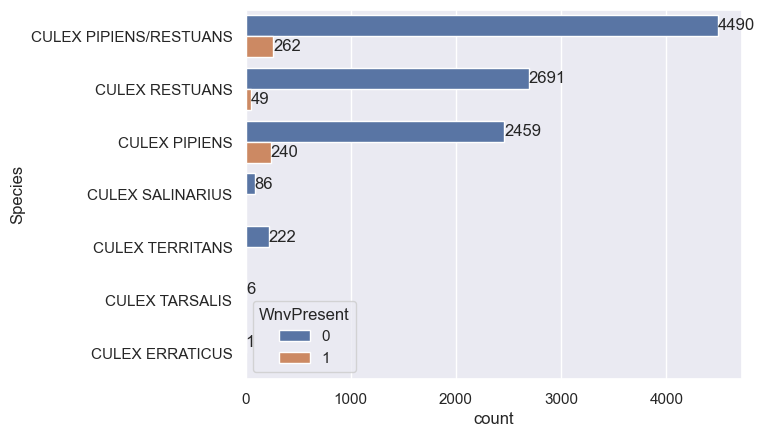

In [1616]:
# WnvPresent in each species
display(train_df.groupby('Species')['WnvPresent'].value_counts())
ax = sns.countplot(train_df, y='Species', hue='WnvPresent')
for container in ax.containers:
    plt.bar_label(container);

In [1617]:
# Number of blocks per trap, there are 1 trap that located in 2 block
print(train_df[['Trap', 'Block']].drop_duplicates().groupby('Trap').count().value_counts())
display(train_df[['Trap', 'Block']].drop_duplicates().groupby('Trap').count().sort_values(by='Block', ascending=False))

display(train_df[train_df['Trap'] == 'T035'][['Latitude', 'Longitude', 'Block']].value_counts())

Block
1        135
2          1
Name: count, dtype: int64


,Block
Trap,
T035,2
T001,1
T142,1
T143,1
T144,1
...,...
T054C,1
T054,1
T051,1


Latitude   Longitude   Block
41.763733  -87.742302  51       45
41.836644  -87.677737  30       27
Name: count, dtype: int64

In [1618]:
# Check block location, is that unique, no overlap ?
print(train_df[['Latitude', 'Longitude', 'Block']].drop_duplicates().groupby(['Latitude', 'Longitude']).count().value_counts())
train_df[['Latitude', 'Longitude', 'Block']].drop_duplicates().groupby(['Latitude', 'Longitude']).count().sort_values(by='Block', ascending=False)

Block
1        138
Name: count, dtype: int64


,,Block
Latitude,Longitude,
41.644612,-87.604498,1
41.923738,-87.785288,1
41.916265,-87.800515,1
41.918705,-87.752329,1
41.919343,-87.694259,1
...,...,...
41.771660,-87.703047,1
41.768388,-87.678649,1
41.766202,-87.562889,1


## Map visualization

In [1619]:
# Spray area
fig = px.scatter_mapbox(
    data_frame=spray_df,
    lat="Latitude", lon="Longitude",
    zoom=9.5,
    color='Date',
    height=800, width=800,
    mapbox_style='open-street-map')

fig.show();

In [1620]:
# Prepare plot data, number of mosquitos and WnvPresent over time
# Sum NumMosquitos and WnvPresent from multiple splitted record
animate_df = train_df.copy()
col = list(animate_df.drop(columns=['NumMosquitos', 'WnvPresent']).columns)
animate_df = animate_df.groupby(col, as_index=False)[['NumMosquitos', 'WnvPresent']].sum()

In [1621]:
# Correcting WnvPresent values
animate_df['WnvPresent'] = animate_df['WnvPresent'].map(lambda x: 0 if x == 0 else 1)

In [1622]:
# Create year_month and year_week for visualization
animate_df['weeknum'] = animate_df['Date'].dt.strftime("%U").astype(int)
animate_df['year'] = animate_df['Date'].dt.year
animate_df['year_month'] = animate_df.apply(lambda x: str(x['Date'].year) + str(x['Date'].month).zfill(2), axis=1)
animate_df['year_week'] = animate_df.apply(lambda x: str(x['year']) + str(x['weeknum'] + x['weeknum']%2).zfill(2), axis=1)
animate_df

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,weeknum,year,year_month,year_week
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0,21,2007,200705,200722
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0,21,2007,200705,200722
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,1,0,21,2007,200705,200722
3,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0,21,2007,200705,200722
4,2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,1,0,21,2007,200705,200722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8470,2013-09-26,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,6,0,38,2013,201309,201338
8471,2013-09-26,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,4,0,38,2013,201309,201338
8472,2013-09-26,"South Vincennes Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S VINCENNES,T089,"1000 S VINCENNES, Chicago, IL",41.723195,-87.649970,5,4,0,38,2013,201309,201338
8473,2013-09-26,"University of Illinois at Chicago, 1100 South ...",CULEX PIPIENS/RESTUANS,11,S ASHLAND AVE,T090,"1100 S ASHLAND AVE, Chicago, IL",41.868077,-87.666901,9,2,0,38,2013,201309,201338


In [1623]:
# Plot number of mosquitos in traps with Wnv present or not
# print(spray_df['Date'].unique())

fig = px.scatter_mapbox(
    data_frame=animate_df,
    lat="Latitude", lon="Longitude",
    zoom=9.5,
    hover_name='Species',
    size='NumMosquitos',
    color='WnvPresent',
    size_max=80,
    animation_frame='year_week',
    range_color=[0, 1],
    height=800, width=800,
    mapbox_style='open-street-map'
)

fig.show()

## Feature Engineering

### Weather rolling average

In [1624]:
# Impute missing data (only 1 row)
display(weather_df_avg.isna().sum())
knn_imp = KNNImputer()
weather_df_avg['StnPressure'] = knn_imp.fit_transform(weather_df_avg[['StnPressure']])

Tmax           0
Tmin           0
Tavg           0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
PrecipTotal    0
StnPressure    1
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [1625]:
# Create weather rolling average dataframe
weather_df_rolling_avg = weather_df_avg.rolling(7).mean().reset_index()

### Train data features
week of year, year and count previous week records per species & block in each year & week of year

In [1626]:
# Extract weeknum, month and year
train_df['weeknum'] = train_df['Date'].dt.strftime("%U").astype(int)
train_df['year'] = train_df['Date'].dt.year
train_df['month'] = train_df['Date'].dt.month

In [1627]:
# Function for counting previous week records
def count_prev_week(row, weeks=1):
    filter_year = train_df['year'] == row['year']
    filter_weeknum = (train_df['weeknum'] == row['weeknum']-weeks)
    filter_species = train_df['Species'] == row['Species']
    filter_block = train_df['Block'] == row['Block']

    return train_df[filter_year & filter_weeknum & filter_species & filter_block].count().values[0]

In [1628]:
# Create previous week(s) records count
train_df['count_prev_week_records'] = train_df.apply(lambda row: count_prev_week(row, 1), axis=1)
# train_df['count_prev_2week_records'] = train_df.apply(lambda row: count_prev_week(row, 2), axis=1)

Create new dataframe, block WnvPresent proportion on each week and year

In [1629]:
train_df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,weeknum,year,month,count_prev_week_records
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,21,2007,5,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,21,2007,5,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,21,2007,5,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,21,2007,5,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,21,2007,5,0


In [1630]:
# Count wnv_not_present records by species + block + week of year
temp_df = train_df.loc[train_df['WnvPresent'] == 0, ['Species', 'Block', 'NumMosquitos', 'WnvPresent', 'weeknum', 'year', 'month']].groupby(['Species', 'Block', 'year', 'month'], as_index=False)['NumMosquitos'].count().rename(columns={'NumMosquitos': 'count_wnv_not_present'})
temp_df = temp_df.groupby(['Species', 'Block', 'month'], as_index=False)['count_wnv_not_present'].mean()

In [1631]:
# Count wnv_present records by species + block + week of year
temp_df_2 = train_df.loc[train_df['WnvPresent'] == 1, ['Species', 'Block', 'NumMosquitos', 'WnvPresent', 'year', 'month']].groupby(['Species', 'Block', 'year', 'month'], as_index=False)['NumMosquitos'].count().rename(columns={'NumMosquitos': 'count_wnv_present'})
temp_df_2 = temp_df_2.groupby(['Species', 'Block', 'month'], as_index=False)['count_wnv_present'].mean()

In [1632]:
# Create wnv_present proportion dataframe
wnv_proportion_df = temp_df.merge(right=temp_df_2, on=['Species', 'Block', 'month'], how='outer')
wnv_proportion_df

,Species,Block,month,count_wnv_not_present,count_wnv_present
0,CULEX ERRATICUS,10,9,1.00,NaN
1,CULEX PIPIENS,10,6,7.00,NaN
2,CULEX PIPIENS,10,7,17.75,NaN
3,CULEX PIPIENS,10,8,54.50,10.333333
4,CULEX PIPIENS,10,9,27.50,4.000000
...,...,...,...,...,...
990,CULEX TERRITANS,89,8,2.00,NaN
991,CULEX TERRITANS,89,9,1.00,NaN
992,CULEX TERRITANS,90,7,1.00,NaN
993,CULEX TERRITANS,91,6,1.00,NaN


In [1633]:
# Calculate wnv_present_proportion
def cal_wnv_present_proportion(row):
    if not np.isnan(row['count_wnv_present']) and not np.isnan(row['count_wnv_not_present']):
        return row['count_wnv_present'] / row['count_wnv_not_present']
    elif np.isnan(row['count_wnv_not_present']):
        return 1
    else:
        return 0

wnv_proportion_df['wnv_present_proportion'] = wnv_proportion_df.apply(cal_wnv_present_proportion, axis=1)
wnv_proportion_df = wnv_proportion_df[['month', 'Block', 'wnv_present_proportion']].groupby(['month', 'Block'], as_index=False).mean()
wnv_proportion_df

,month,Block,wnv_present_proportion
0,5,10,0.0
1,5,11,0.0
2,5,12,0.0
3,5,13,0.0
4,5,15,0.0
...,...,...,...
326,10,82,0.0
327,10,91,0.0
328,10,93,0.0
329,10,96,0.0


In [1634]:
# Create wnv_present_proportion average per block for missing month + block in test data
wnv_proportion_df_block_avg = wnv_proportion_df[['Block', 'wnv_present_proportion']].groupby('Block', as_index=False).mean()
wnv_proportion_df_block_avg

,Block,wnv_present_proportion
0,10,0.028705
1,11,0.025811
2,12,0.051215
3,13,0.033578
4,14,0.087857
...,...,...
59,90,0.134048
60,91,0.082771
61,93,0.020000
62,96,0.000000


In [1635]:
# Check data that are not equivalent in test_df
# df1 = temp_df[['Species', 'Block', 'month']].drop_duplicates()
# df2 = test_df[['Species', 'Block', 'month']]

# # Find rows in df1 but not in df2
# df1_not_in_df2 = pd.merge(df1, df2, on=['Block', 'month'], how='outer', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)

# # Find rows in df2 but not in df1
# df2_not_in_df1 = pd.merge(df1, df2, on=['Block', 'month'], how='outer', indicator=True).query('_merge == "right_only"').drop('_merge', axis=1)

# # Display the results
# print("Rows only in df1:")
# print(df1_not_in_df2)

# print("\nRows only in df2:")
# print(df2_not_in_df1)

In [1636]:
# Create wnv_present proportion dataframe
# wnv_proportion_df = pd.DataFrame(temp_df.groupby(['Species', 'month', 'Block'])['count_wnv_present'].mean()/temp_df.groupby(['Species', 'month', 'Block'])['count_wnv_not_present'].mean(), columns=['wnv_present_proportion']).reset_index()
# wnv_proportion_df

In [1637]:
# Merge into train_df
train_df = train_df.merge(right=wnv_proportion_df_block_avg, on='Block', how='left')
train_df.isna().sum()

Date                       0
Address                    0
Species                    0
Block                      0
Street                     0
Trap                       0
AddressNumberAndStreet     0
Latitude                   0
Longitude                  0
AddressAccuracy            0
NumMosquitos               0
WnvPresent                 0
weeknum                    0
year                       0
month                      0
count_prev_week_records    0
wnv_present_proportion     0
dtype: int64

## Modelling

### Join train data with weather rolling average

In [1638]:
# Convert date to datetime'
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [1639]:
# Feature selection

# 'weeknum', 'year', 'month', 'Tavg', 'PrecipTotal', 'StnPressure', 'ResultDir', 'AvgSpeed'
# Correlate weather features -> 'Tmin', 'Tmax', 'Heat', 'Cool', 'WetBulb', 'DewPoint', 'ResultSpeed', 'SeaLevel'
num_features = ['weeknum', 'year', 'Tavg', 'PrecipTotal', 'StnPressure', 'ResultDir', 'AvgSpeed']

# These columns will be dummified
# 'Species', 'Block'
cat_features = ['Species', 'Block']

# 'count_prev_week_records', 'count_prev_2week_records', 'wnv_present_proportion'
eng_features = ['count_prev_week_records', 'wnv_present_proportion']

# weather_df_avg, weather_df_rolling_avg
weather_for_merge = weather_df_avg

In [1640]:
# Merge train & weather rolling avg
combined_df = train_df.merge(
    right=weather_for_merge,
    on='Date'
)

combined_df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,58.5,65.5,0.0,10.5,0.0,29.415,30.1,5.8,17.0,6.95
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,58.5,65.5,0.0,10.5,0.0,29.415,30.1,5.8,17.0,6.95
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,58.5,65.5,0.0,10.5,0.0,29.415,30.1,5.8,17.0,6.95
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,58.5,65.5,0.0,10.5,0.0,29.415,30.1,5.8,17.0,6.95
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,58.5,65.5,0.0,10.5,0.0,29.415,30.1,5.8,17.0,6.95


In [1641]:
X = pd.get_dummies(combined_df[num_features + cat_features + eng_features], columns=cat_features, drop_first=True)
y = combined_df['WnvPresent']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, stratify=y)

In [1642]:
# Scale & Oversampling
from imblearn.over_sampling import SMOTE

ss = StandardScaler()
sm = SMOTE()

X_train_sc = ss.fit_transform(X_train)
Xsm_train, ysm_train = sm.fit_resample(X_train_sc, y_train)

In [1643]:
# Scale validation set
X_val_sc = ss.transform(X_val)

### Logistic Regression

In [1644]:
lr = LogisticRegression(max_iter=1000)
lr.fit(Xsm_train, ysm_train)

LogisticRegression(max_iter=1000)

In [1645]:
lr.score(Xsm_train, ysm_train)

0.748392713635146

In [1646]:
lr.score(X_val_sc, y_val)

0.674914350970689

### Random Forest

In [1647]:
rf = RandomForestClassifier()
rf.fit(Xsm_train, ysm_train)

RandomForestClassifier()

In [1648]:
rf.score(Xsm_train, ysm_train)

0.9742834181623359

In [1649]:
rf.score(X_val_sc, y_val)

0.9219642177388656

### XGBoost

In [1650]:
xgb = XGBClassifier()
xgb.fit(Xsm_train, ysm_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [1651]:
xgb.score(Xsm_train, ysm_train)

0.9677873024377176

In [1652]:
xgb.score(X_val_sc, y_val)

0.923486867148839

### Retrain with full dataset

In [1653]:
X_sc = ss.fit_transform(X)
Xsm, ysm = sm.fit_resample(X_sc, y)

lr.fit(Xsm, ysm)
rf.fit(Xsm, ysm)
xgb.fit(Xsm, ysm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Submission

In [1654]:
# Preprocess data
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['weeknum'] = test_df['Date'].dt.strftime("%U").astype(int)
test_df['year'] = test_df['Date'].dt.year
test_df['month'] = test_df['Date'].dt.month

test_df['count_prev_week_records'] = test_df.apply(lambda row: count_prev_week(row, 1), axis=1)
# test_df['count_prev_2week_records'] = test_df.apply(lambda row: count_prev_week(row, 2), axis=1)

# test_df = test_df.merge(right=wnv_proportion_df, on=['Species', 'month', 'Block'], how='left').fillna(0)
# test_df = test_df.merge(right=wnv_proportion_df, on=['month', 'Block'], how='left')
test_df = test_df.merge(right=wnv_proportion_df_block_avg, on='Block', how='left').fillna(0)
test_df.isna().sum()

Id                         0
Date                       0
Address                    0
Species                    0
Block                      0
Street                     0
Trap                       0
AddressNumberAndStreet     0
Latitude                   0
Longitude                  0
AddressAccuracy            0
weeknum                    0
year                       0
month                      0
count_prev_week_records    0
wnv_present_proportion     0
dtype: int64

In [1655]:
# Fill missing wnv_present_proportion in test data with the block average, if still missing, fill with 0
# def fill_wnv_present_proportion_na_with_avg_or_zero(row):
#     if np.isnan(row['wnv_present_proportion_x']) and np.isnan(row['wnv_present_proportion_y']):
#         return 0
#     else:
#         return row['wnv_present_proportion_y']

# test_df['wnv_present_proportion'] = test_df.apply(fill_wnv_present_proportion_na_with_avg_or_zero, axis=1)
# test_df.isna().sum()

In [1656]:
# Join with weather rolling average
combined_test_df = test_df.merge(
    right=weather_for_merge,
    on='Date'
)

In [1657]:
# Check null value
combined_test_df.isna().sum()

Id                         0
Date                       0
Address                    0
Species                    0
Block                      0
Street                     0
Trap                       0
AddressNumberAndStreet     0
Latitude                   0
Longitude                  0
AddressAccuracy            0
weeknum                    0
year                       0
month                      0
count_prev_week_records    0
wnv_present_proportion     0
Tmax                       0
Tmin                       0
Tavg                       0
DewPoint                   0
WetBulb                    0
Heat                       0
Cool                       0
PrecipTotal                0
StnPressure                0
SeaLevel                   0
ResultSpeed                0
ResultDir                  0
AvgSpeed                   0
dtype: int64

In [1658]:
X_test = pd.get_dummies(combined_test_df[num_features + cat_features + eng_features], columns=cat_features, drop_first=True)

# Align
X_test, _ = X_test.align(pd.DataFrame(Xsm, columns=X.columns), join='right', axis=1, fill_value=0)

# Scale
X_test_sc = ss.transform(X_test)

In [1659]:
prediction_lr = pd.DataFrame(lr.predict(X_test_sc), columns=['WnvPresent'])
prediction_rf = pd.DataFrame(rf.predict(X_test_sc), columns=['WnvPresent'])
prediction_xgb = pd.DataFrame(xgb.predict(X_test_sc), columns=['WnvPresent'])

In [1660]:
pd.concat([test_df['Id'], prediction_lr], axis=1).to_csv('../submission/submission_lr.csv', index=False)
pd.concat([test_df['Id'], prediction_rf], axis=1).to_csv('../submission/submission_rf.csv', index=False)
pd.concat([test_df['Id'], prediction_xgb], axis=1).to_csv('../submission/submission_xgb.csv', index=False)